# Programming Project #1: Hybrid Images

## CS445: Computational Photography

### Part I: Hybrid Images

In [1]:
import cv2

import numpy as np
from matplotlib.colors import LogNorm
from scipy import signal
import utils

In [2]:
# switch from notebook to inline if using colab or otherwise cannot use interactive display)
%matplotlib ipympl
import matplotlib.pyplot as plt

In [3]:
datadir = "./"

im1_file = datadir + 'nutmeg.jpg'
im2_file = datadir + 'DerekPicture.jpg'

im1 = np.float32(cv2.imread(im1_file, cv2.IMREAD_GRAYSCALE) / 255.0)
im2 = np.float32(cv2.imread(im2_file, cv2.IMREAD_GRAYSCALE) / 255.0)

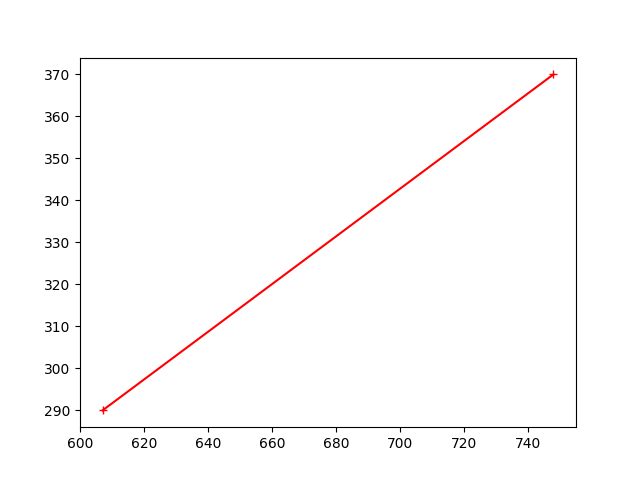

In [4]:
# pts_im1 = utils.prompt_eye_selection(im1)
pts_im1 = np.array([[607, 290], [748, 370]]) # uncomment if entering [x, y] pts manually
plt.plot(pts_im1[:,0], pts_im1[:,1], 'r-+')

In [5]:
# pts_im2 = utils.prompt_eye_selection(im2)
pts_im2 = np.array([[299,343], [439,331]]) # uncomment if entering [x, y] pts manually
plt.plot(pts_im2[:,0], pts_im2[:,1], 'r-+')

In [6]:
im1, im2 = utils.align_images(im1_file, im2_file,pts_im1,pts_im2,save_images=False)


In [7]:
# convert to grayscale
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY) / 255.0
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY) / 255.0

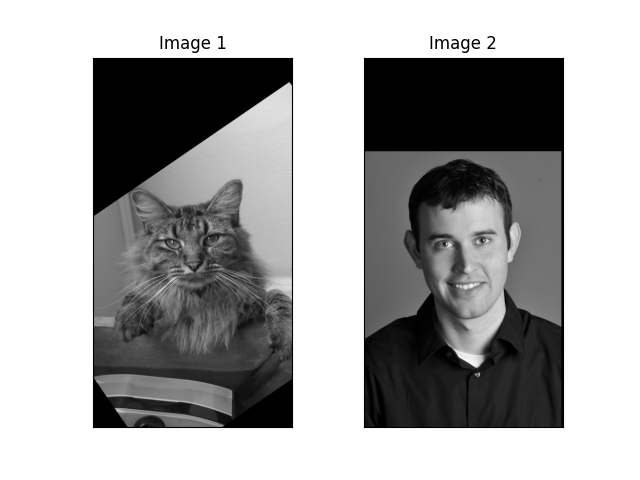

In [8]:
#Images sanity check
fig, axes = plt.subplots(1, 2)
axes[0].imshow(im1,cmap='gray')
axes[0].set_title('Image 1'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(im2,cmap='gray')
axes[1].set_title('Image 2'), axes[1].set_xticks([]), axes[1].set_yticks([])
plt.show()

In [ ]:
def hybridImage(im1, im2, sigma_low, sigma_high):
    '''
    Inputs:
        im1:    RGB (height x width x 3) or a grayscale (height x width) image
                as a numpy array.
        im2:    RGB (height x width x 3) or a grayscale (height x width) image
                as a numpy array.
        sigma_low: standard deviation for the low-pass filter
        sigma_high: standard deviation for the high-pass filter
        
    Output:
        Return the combination of both images, one filtered with a low-pass filter
        and the other with a high-pass filter.
    '''  

    im2_fft = np.abs(np.fft.fftshift(np.fft.fft2(im2)))
    utils.plot_spectrum(im2_fft)
    plt.show()
    
    fft_lowpass_mask = np.zeros((im2_fft.shape[0], im2_fft.shape[1], 2))
    # TODO ELC LEAVING OFF, need to do a gaussian kernel fft and multiply..?, not cut a circle out of the image fft
    im2_masked_fft = cv2.circle(fft_lowpass_mask, (im2_fft.shape[0] // 2, im2_fft.shape[1] // 2), radius=sigma_low, 1, -1)
    utils.plot_spectrum(im2_masked_fft)



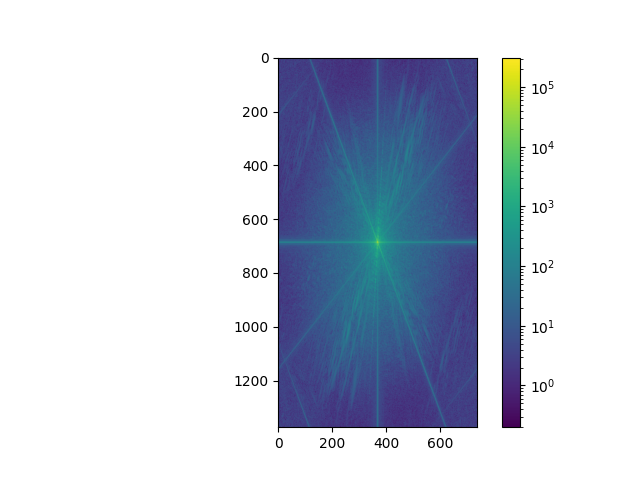

TypeError: unsupported operand type(s) for -: 'tuple' and 'int'

In [16]:
sigma_low = 20 # choose parameters that work for your images
sigma_high = 20

im_hybrid = hybridImage(im2, im1, sigma_low, sigma_high)


In [ ]:
# Optional: Select top left corner and bottom right corner to crop image
# the function returns dictionary of 
# {
#   'cropped_image': np.ndarray of shape H x W
#   'crop_bound': np.ndarray of shape 2x2
# }
cropped_object = utils.interactive_crop(im_hybrid)

### Part II: Image Enhancement

##### Two out of three types of image enhancement are required.  Choose a good image to showcase each type and implement a method.  This code doesn't rely on the hybrid image part.

#### Contrast enhancement

#### Color enhancement 

#### Color shift